In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
from tqdm import tqdm
from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import pixel_to_skycoord, skycoord_to_pixel
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
from scipy.ndimage.filters import gaussian_filter
tqdm.pandas()
import cmocean
import matplotlib as mpl

c:\Users\Matt\.conda\envs\astronomy\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
PATH_RAW = 'D:/Workshop/PhD/Data/ViaLactea/PPMAP_Results/'
PATH_64x85 = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px_rejigged_fulltile/'
PATH_32x17 = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/32px_rejigged_fulltile_64pxwindow/'
PATH_32x85 = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/32px_rejigged_fulltile/'

In [3]:
no_files = len(os.listdir(PATH_32x17+'DataCubes'))
no_files

163

In [4]:
## Calculate bins
H_min, H_max = 0, 1.25
S_min, S_max = 0, 3.25
H_bins = np.linspace(H_min, H_max, 101)
S_bins = np.linspace(S_min, S_max, 101)

H_bins_2d = np.linspace(H_min,H_max,201)
S_bins_2d = np.linspace(S_min,S_max,201)
H_bins

array([0.    , 0.0125, 0.025 , 0.0375, 0.05  , 0.0625, 0.075 , 0.0875,
       0.1   , 0.1125, 0.125 , 0.1375, 0.15  , 0.1625, 0.175 , 0.1875,
       0.2   , 0.2125, 0.225 , 0.2375, 0.25  , 0.2625, 0.275 , 0.2875,
       0.3   , 0.3125, 0.325 , 0.3375, 0.35  , 0.3625, 0.375 , 0.3875,
       0.4   , 0.4125, 0.425 , 0.4375, 0.45  , 0.4625, 0.475 , 0.4875,
       0.5   , 0.5125, 0.525 , 0.5375, 0.55  , 0.5625, 0.575 , 0.5875,
       0.6   , 0.6125, 0.625 , 0.6375, 0.65  , 0.6625, 0.675 , 0.6875,
       0.7   , 0.7125, 0.725 , 0.7375, 0.75  , 0.7625, 0.775 , 0.7875,
       0.8   , 0.8125, 0.825 , 0.8375, 0.85  , 0.8625, 0.875 , 0.8875,
       0.9   , 0.9125, 0.925 , 0.9375, 0.95  , 0.9625, 0.975 , 0.9875,
       1.    , 1.0125, 1.025 , 1.0375, 1.05  , 1.0625, 1.075 , 1.0875,
       1.1   , 1.1125, 1.125 , 1.1375, 1.15  , 1.1625, 1.175 , 1.1875,
       1.2   , 1.2125, 1.225 , 1.2375, 1.25  ])

In [5]:
hist_a = np.zeros(100, dtype='int32')
hist_b = np.zeros(100, dtype='int32')
hist_c = np.zeros(100, dtype='int32')
hist_d = np.zeros(100, dtype='int32')
hist_e = np.zeros(100, dtype='int32')
hist_f = np.zeros(100, dtype='int32')

hist_g = np.zeros((200,200))
hist_h = np.zeros((200,200))
hist_i = np.zeros((200,200))

for i in tqdm(range(no_files)):
    cube_64x85 = pickle.load(open(f'{PATH_64x85}/DataCubes/{os.listdir(PATH_64x85+"DataCubes")[i]}','rb'))
    cube_32x85 = pickle.load(open(f'{PATH_32x85}/DataCubes/{os.listdir(PATH_32x85+"DataCubes")[i]}','rb'))
    cube_32x17 = pickle.load(open(f'{PATH_32x17}/DataCubes/{os.listdir(PATH_32x17+"DataCubes")[i]}','rb'))

    temp_df = pd.DataFrame()
    temp_df['H_64x85'] = np.pad(cube_64x85[1],((32,31),(32,31)), 'constant', constant_values = np.nan).flatten()
    temp_df['H_32x85'] = np.pad(cube_32x85[1],((16,15),(16,15)), 'constant', constant_values = np.nan).flatten()
    temp_df['H_32x17'] = np.pad(cube_32x17[1],((32,31),(32,31)), 'constant', constant_values = np.nan).flatten()
    temp_df['S_64x85'] = np.pad(cube_64x85[2],((32,31),(32,31)), 'constant', constant_values = np.nan).flatten()
    temp_df['S_32x85'] = np.pad(cube_32x85[2],((16,15),(16,15)), 'constant', constant_values = np.nan).flatten()
    temp_df['S_32x17'] = np.pad(cube_32x17[2],((32,31),(32,31)), 'constant', constant_values = np.nan).flatten()
    temp_df = temp_df.dropna()

    hist_a_temp , jnk = np.histogram(temp_df['H_32x85'], bins=H_bins)
    hist_b_temp , jnk = np.histogram(temp_df['H_32x17'], bins=H_bins)
    hist_c_temp , jnk = np.histogram(temp_df['H_64x85'], bins=H_bins)

    hist_d_temp , jnk = np.histogram(temp_df['S_32x85'], bins=S_bins)
    hist_e_temp , jnk = np.histogram(temp_df['S_32x17'], bins=S_bins)
    hist_f_temp , jnk = np.histogram(temp_df['S_64x85'], bins=S_bins)

    hist_g_temp, jnk, jnk = np.histogram2d(temp_df['S_32x85'],temp_df['H_32x85'],bins=[S_bins_2d,H_bins_2d])
    hist_h_temp, jnk, jnk = np.histogram2d(temp_df['S_32x17'],temp_df['H_32x17'],bins=[S_bins_2d,H_bins_2d])
    hist_i_temp, jnk, jnk = np.histogram2d(temp_df['S_64x85'],temp_df['H_64x85'],bins=[S_bins_2d,H_bins_2d])

    hist_a += hist_a_temp
    hist_b += hist_b_temp
    hist_c += hist_c_temp
    hist_d += hist_d_temp
    hist_e += hist_e_temp
    hist_f += hist_f_temp
    hist_g += hist_g_temp
    hist_h += hist_h_temp
    hist_i += hist_i_temp
print(hist_c.sum())

100%|██████████| 163/163 [10:47<00:00,  3.97s/it]

278701231


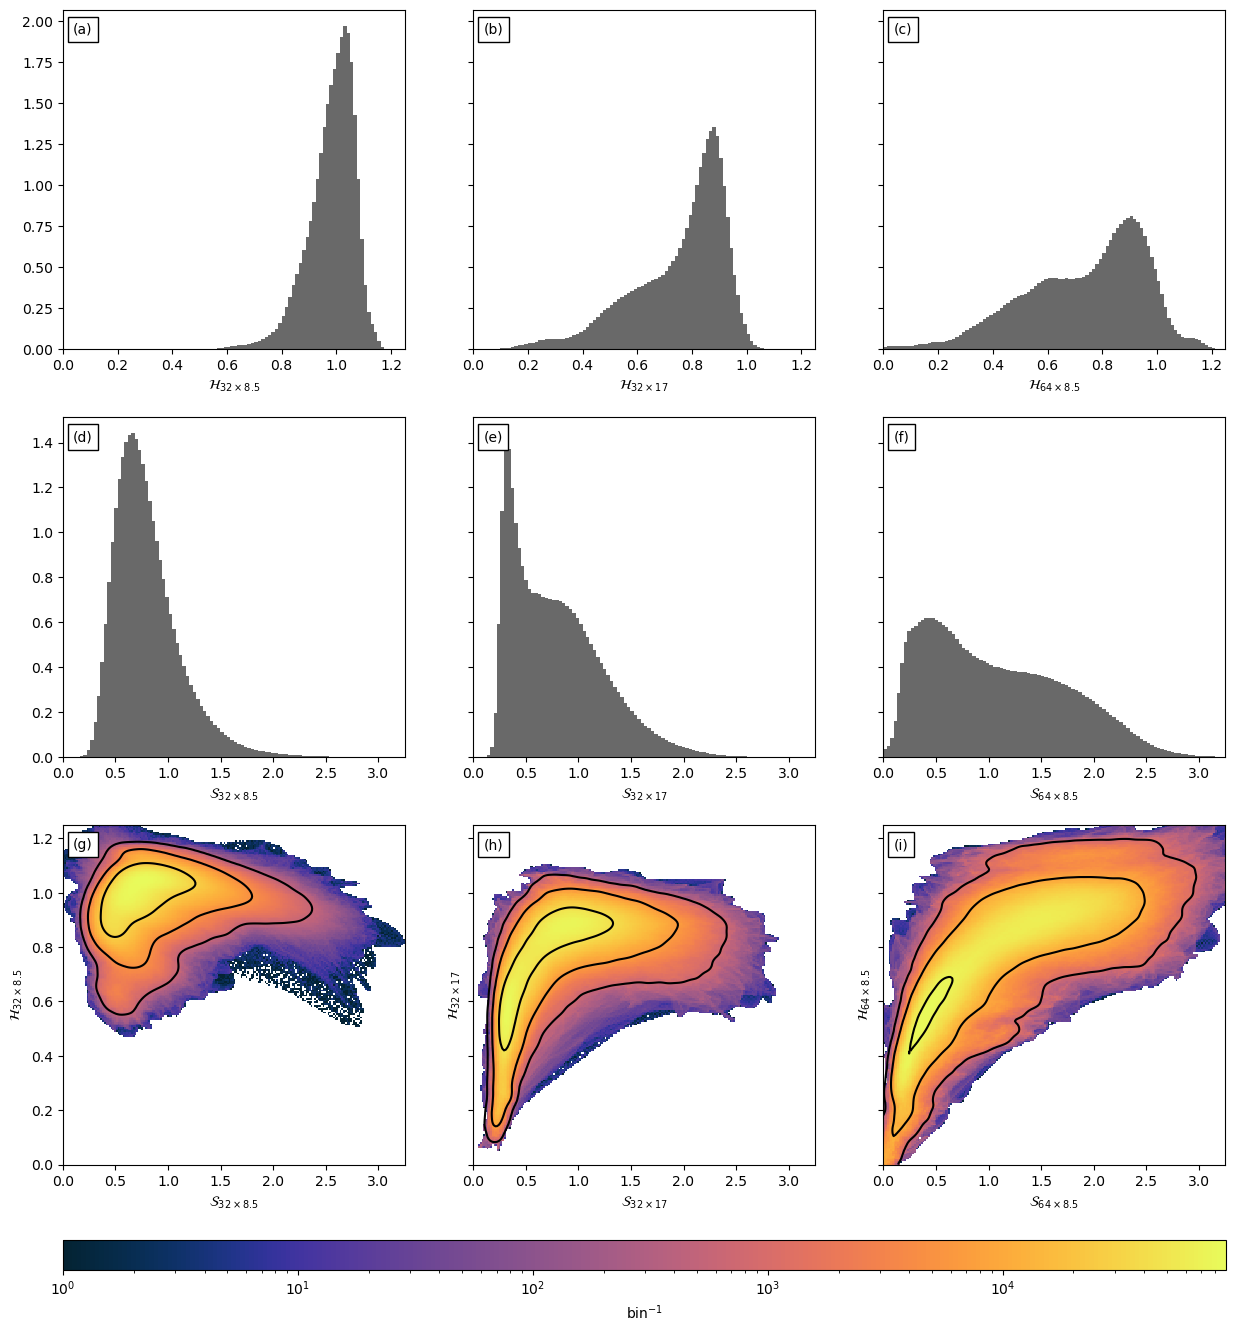

In [34]:
x = 0.03
y = 0.93
sigma = 2

f,ax = plt.subplots(3,3, figsize=(15,15), sharey ='row')

ax[0,0].hist(H_bins[:-1], bins=H_bins, facecolor='dimgrey', weights = hist_a/10**7)
ax[0,0].set_xlabel(r'$\mathcal{H}_{32\times 8.5}$')
ax[0,0].text(x,y, '(a)', transform=ax[0,0].transAxes,bbox = dict(facecolor='white'))
ax[0,0].set_xlim([0,1.25])
ax[0,0].ticklabel_format(useOffset=False, style='plain')

ax[0,1].hist(H_bins[:-1], bins=H_bins, facecolor='dimgrey', weights = hist_b/10**7)
ax[0,1].set_xlabel(r'$\mathcal{H}_{32\times 17}$')
ax[0,1].text(x,y, '(b)', transform=ax[0,1].transAxes,bbox = dict(facecolor='white'))
ax[0,1].set_xlim([0,1.25])
ax[0,1].ticklabel_format(useOffset=False, style='plain')

ax[0,2].hist(H_bins[:-1], bins=H_bins, facecolor='dimgrey', weights = hist_c/10**7)
ax[0,2].set_xlabel(r'$\mathcal{H}_{64\times 8.5}$')
ax[0,2].text(x,y, '(c)', transform=ax[0,2].transAxes,bbox = dict(facecolor='white'))
ax[0,2].set_xlim([0,1.25])
ax[0,2].ticklabel_format(useOffset=False, style='plain')

ax[1,0].hist(S_bins[:-1], bins=S_bins, facecolor='dimgrey', weights = hist_d/10**7)
ax[1,0].set_xlabel(r'$\mathcal{S}_{32\times 8.5}$')
ax[1,0].text(x,y, '(d)', transform=ax[1,0].transAxes,bbox = dict(facecolor='white'))
ax[1,0].set_xlim([0,3.25])
ax[1,0].ticklabel_format(useOffset=False, style='plain')

ax[1,1].hist(S_bins[:-1], bins=S_bins, facecolor='dimgrey', weights = hist_e/10**7)
ax[1,1].set_xlabel(r'$\mathcal{S}_{32\times 17}$')
ax[1,1].text(x,y, '(e)', transform=ax[1,1].transAxes,bbox = dict(facecolor='white'))
ax[1,1].set_xlim([0,3.25])
ax[1,1].ticklabel_format(useOffset=False, style='plain')

ax[1,2].hist(S_bins[:-1], bins=S_bins, facecolor='dimgrey', weights = hist_f/10**7)
ax[1,2].set_xlabel(r'$\mathcal{S}_{64\times 8.5}$')
ax[1,2].text(x,y, '(f)', transform=ax[1,2].transAxes,bbox = dict(facecolor='white'))
ax[1,2].set_xlim([0,3.25])
ax[1,2].ticklabel_format(useOffset=False, style='plain')

ax[2,0].pcolormesh(S_bins_2d,H_bins_2d,hist_g.T, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
contours = ax[2,0].contour(gaussian_filter(hist_g.transpose(),sigma), 
                extent = [S_min,S_max,H_min,H_max],
                levels = [1000,10000,70000],
                           colors='k'
               )

ax[2,0].set_xlabel(r'$\mathcal{S}_{32\times 8.5}$')
ax[2,0].set_ylabel(r'$\mathcal{H}_{32\times 8.5}$')
ax[2,0].text(x,y, '(g)', transform=ax[2,0].transAxes,bbox = dict(facecolor='white'))
ax[2,0].set_xlim([0,3.25])
ax[2,0].set_ylim([0,1.25])

ax[2,1].pcolormesh(S_bins_2d,H_bins_2d,hist_h.T, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
contours = ax[2,1].contour(gaussian_filter(hist_h.transpose(),sigma), 
                extent = [S_min,S_max,H_min,H_max],
                levels = [1000,10000,70000],
                           colors='k'
               )

ax[2,1].set_xlabel(r'$\mathcal{S}_{32\times 17}$')
ax[2,1].set_ylabel(r'$\mathcal{H}_{32\times 17}$')
ax[2,1].text(x,y, '(h)', transform=ax[2,1].transAxes,bbox = dict(facecolor='white'))
ax[2,1].set_xlim([0,3.25])
ax[2,1].set_ylim([0,1.25])

img = ax[2,2].pcolormesh(S_bins_2d,H_bins_2d,hist_i.T, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
contours = ax[2,2].contour(gaussian_filter(hist_i.transpose(),sigma), 
                extent = [S_min,S_max,H_min,H_max],
                levels = [1000,10000,70000],
                           colors='k'
               )

ax[2,2].set_xlabel(r'$\mathcal{S}_{64\times 8.5}$')
ax[2,2].set_ylabel(r'$\mathcal{H}_{64\times 8.5}$')
ax[2,2].text(x,y, '(i)', transform=ax[2,2].transAxes,bbox = dict(facecolor='white'))
ax[2,2].set_xlim([0,3.25])
ax[2,2].set_ylim([0,1.25])

cbaxes = f.add_axes([0.1252, 0.04, 0.775, 0.02]) 
cb = plt.colorbar(img,orientation="horizontal", cax = cbaxes, label=r'$\mathrm{bin}^{-1}$')

plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/DistributionsLog.png',bbox_inches="tight")
plt.show()